In [2]:
## Imports

import numpy as np
import matplotlib.pyplot as plt

Alice CHRISTOLOMME, 
Colin COERCHON, 
Adam EL GERSSIFI, 
Benoît MARTINEZ

# Projet mathématique - Partie I

 L'objectif de cette partie est d'étudier la statut des élèves de notre projet d'informatique au cours du temps. Dans cette simulation, la matrice de probabilités de transition est aléatoire et arbitraire, et nous étudions simplement les interractions entre le monstre et les membres dans les différentes zones. Les joueuses n'entre pas en compte dans cette partie.

## Introduction aux chaînes de Markov, simulation et estimation par Monte Carlo

### Question 1

Soit $n\in\mathbb{N}$.

Supposons que $p_1, . . . , p_n$ sont des nombres réels positifs tels que $\sum_{i=1}^np_i=1$. Soient $x_1 < x_2 < · · · < x_n$ des nombres réels arbitraires. Considérons une variable aléatoire discrète $X$ prenant des valeurs dans l’ensemble $\{x_1, x_2, . . . , x_n\}$ telle que 
$$P(X = x_i) = p_i, \quad i = 1, \dots , n.$$

On simule une réalisation $y$ de la variable aléatoire $X$.

In [3]:
#M simulations d’une variable aleatoire discrète sur l'échantillon x selon les probabilités p.
def sim_dis(p, x, M):
    y=np.zeros(M)
    #La boucle se termine car M est fini.
    for k in range(M):
        #On choisit un réel entre 0 et 1 par une loi uniforme
        u=np.random.uniform(0,1)
        S,i=0,0
        #On somme les probabilités dans S jusqu'à dépasser ce u.
        #La boucle se termine car S augmente à chaque itération et que la somme des p[i] vaut 1.
        while S<u:
            S+=p[i]
            i+=1
        j=i-1
        #On selectionne le x correspondant.
        y[k] = x[j]
    return y

On teste avec des probabilités ($p$) et des valeurs ($x$) arbitraires, répété dix fois.

In [4]:
#Test de la fonction sim_dis avec des valeurs arbitraires.
p=[0.5,0.2,0.3]
x=[1,2,3]
M=10

y=sim_dis(p,x,M)
print(y)

[3. 1. 2. 1. 1. 2. 3. 2. 1. 2.]


On remarque que le 1 apparaît plus que les autres valeurs, ce qui est cohérent par rapport à nos probabilités fixées.

### Question 2

Considérons $X_1, X_2, . . . , X_N$ des variables aléatoires i.i.d. telles que 

$$P(X_i = 1) = p \in [0, 1], P(X_i = −1) = q = 1 − p, \quad i = 1, . . . , N.$$

Soit $S_n$ la marche aléatoire (entre 0 et $N$) définie par

$$S_n = S_0 + X_1 + . . . + X_n, \quad 1 ≤ n ≤ N.$$

Supposons que $N = 100$, $S_0 = 5$ et $p = 0.5$ (marche aléatoire symétrique). 

Simulons $M = 1000$ trajectoires indépendantes de cette marche aléatoire (entre 0 et $N$)  et traçons 10 de ces trajectoires sur un seul graphique.

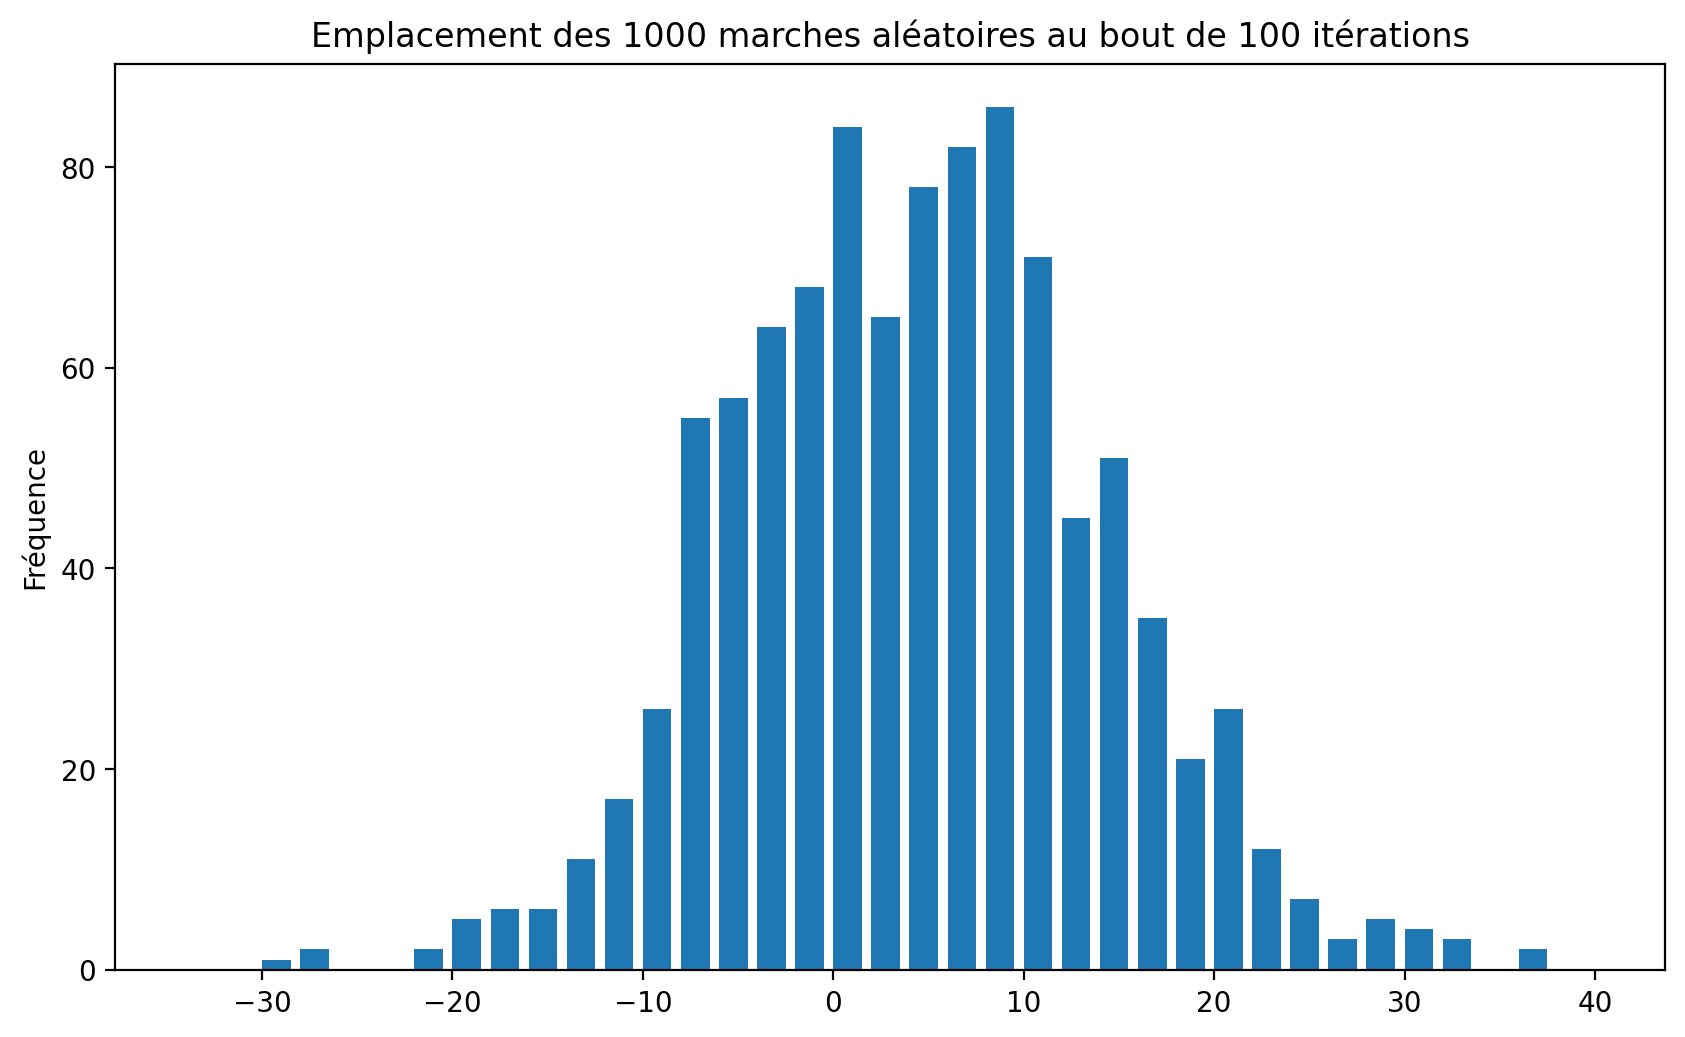

In [31]:
N = 100
M = 1000
S0 = 5
p = 0.5

#Retourne la position finale de l'étudiant d'une marche aléatoire de N itérations sur M simulations.
def marche_aleatoire(p, S0, N, M):
    S=S0*np.ones(M)
    #On fait les N itérations de la marche aléatoire pour chaque k.
    #La boucle se termine car M est fini.
    for k in range(M):
        #Tableau de taille N qui prend les valeurs 1 ou -1 selon la probabilité p.
        X=sim_dis([1-p,p],[-1,1],N)
        #Position finale de la marche aléatoire.
        S[k]+=np.sum(X)
    return S

S = marche_aleatoire(p, S0, N, M)
 
fig = plt.figure(figsize=(10,6),dpi=200)

plt.hist(S, bins=np.arange(min(S) - 5, max(S) + 5, 2), width = 1.5)
plt.title("Emplacement des 1000 marches aléatoires au bout de 100 itérations")
plt.ylabel("Fréquence")
plt.show() 

On remarque que l'histogramme semble se rapprocher d'une gaussienne centrée en $S_0$.

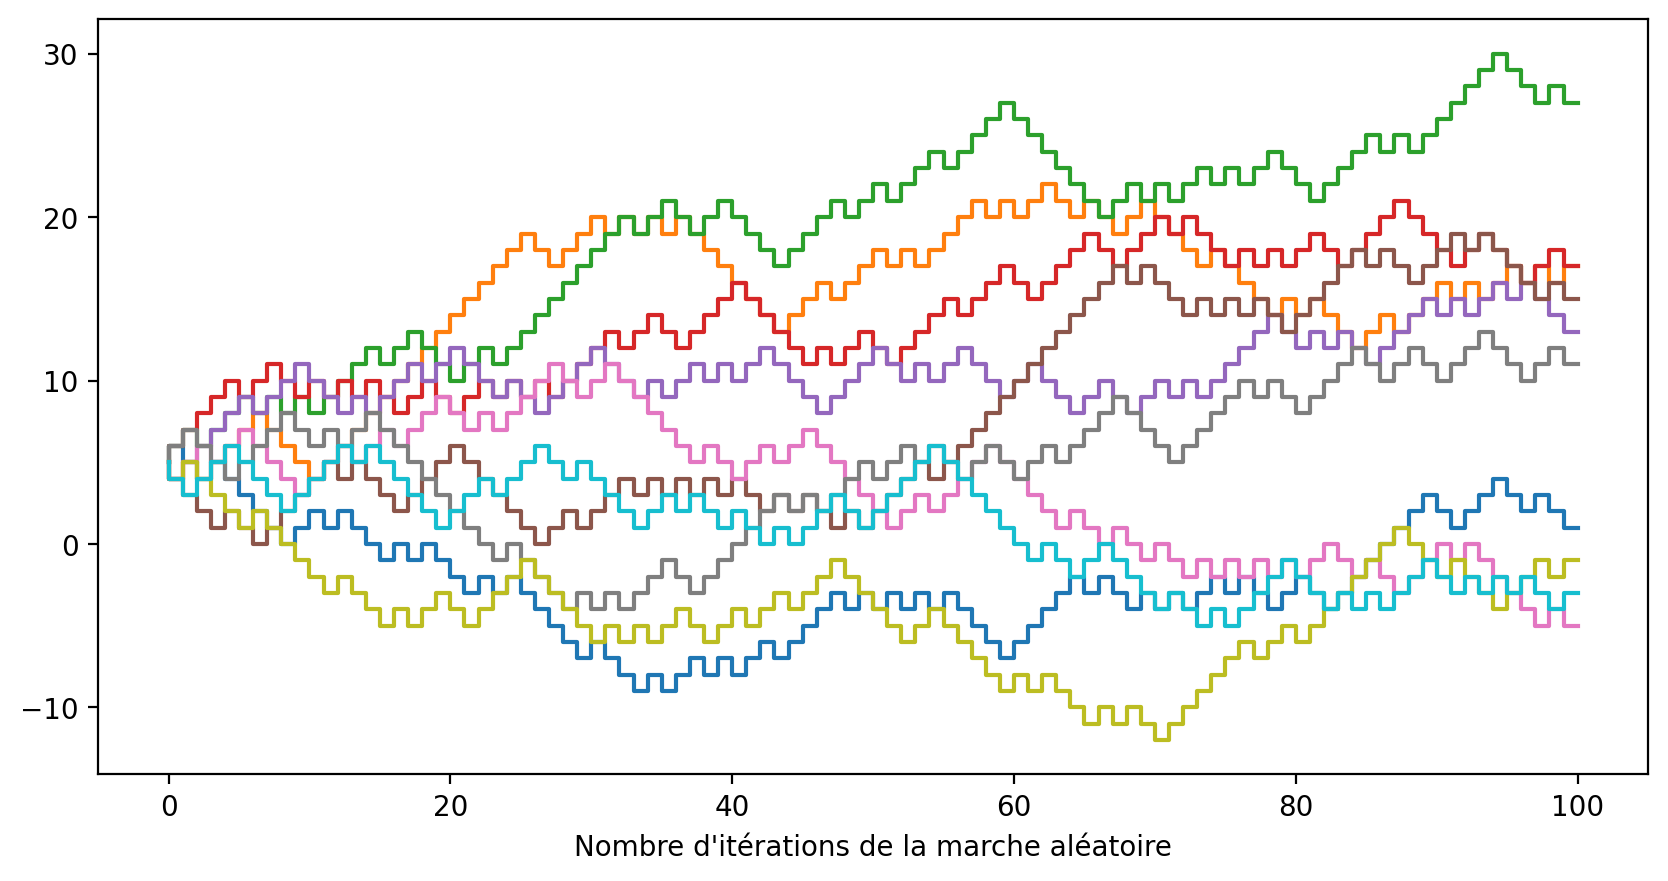

In [37]:
fig = plt.figure(figsize=(10,5),dpi=200)

#Tracé de M trajectoires des marches aléatoires sur N itérations en partant de S0.
def tracer_traj(p, S0, N, M):
    X=np.zeros((N+1,M))
    X[0,:]=S0
    #La boucle se termine car N est fini.
    #On srocke toutes les positions de nos M marches aléatoires.
    for k in range(1,N+1):
        X[k,:] = + X[k-1,:] + sim_dis([1-p,p],[-1,1],M)
    #plt.plot(X)
    plt.step(range(N+1), X)

tracer_traj(p, S0, N, 10)  # M = 10 ici (tracé de 10 trajectoires)

plt.xlabel("Nombre d'itérations de la marche aléatoire")
plt.show()

On remarque que si on augmente $M$, par exemple à $M=1000$, le résultat se rapproche d'un cône.
On a choisi de représenter la marche aléatoire grâce à $\texttt{plt.step}$ plutôt que $\texttt{plt.plot}$, car cela permet de mieux visualiser une marche aléatoire.

Voici le "cône" obtenu avec $M = 1000$ :

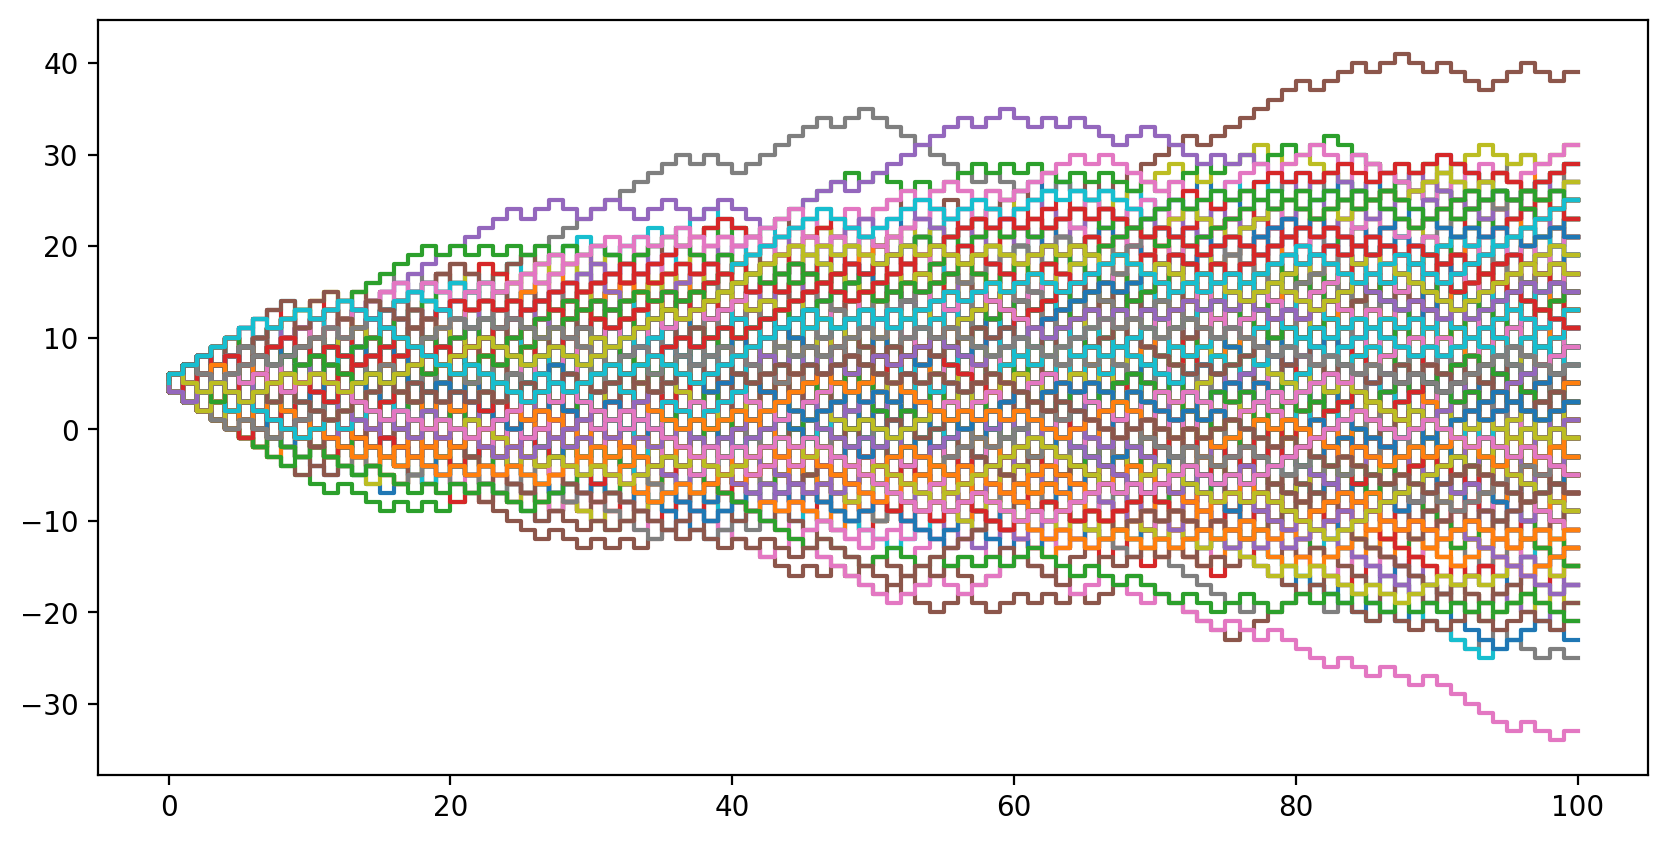

In [38]:
fig = plt.figure(figsize=(10,5),dpi=200)

#Tracé de M trajectoires des marches aléatoires sur N itérations en partant de S0.
def tracer_traj(p, S0, N, M):
    X=np.zeros((N+1,M))
    X[0,:]=S0
    #La boucle se termine car N est fini.
    #On srocke toutes les positions de nos M marches aléatoires.
    for k in range(1,N+1):
        X[k,:] = + X[k-1,:] + sim_dis([1-p,p],[-1,1],M)
    #plt.plot(X)
    plt.step(range(N+1), X)

tracer_traj(p, S0, N, 1000)  # M = 10 ici (tracé de 10 trajectoires)

plt.show()

### Question 3

Nous allons déterminer la probabilité : $\mathbb{P}(S_N \geq 5)$

On le fait premièrement de manière analytique, puis de manière empirique.

On se donne $X_1, X_2, \dots, X_N$ des aléatoires i.i.d. de Rademacher. C'est-à-dire que :
\begin{align*}
    \forall i \in [ 1, N ],\, \quad &\mathbb{P}(X_i = 1) = p \in [0;1] \\
    \text{et} \quad &\mathbb{P}(X_i = -1) = q = 1 - p \in [0;1]
\end{align*}

Donc $\forall i \in [ 1, N ], \quad \Omega(X_i) = \{-1, 1\}$.

Soit $S_n$ la marche aléatoire (avec $n \in [ 1, N ]$) définie par : $\displaystyle S_n = S_0 + \sum_{i=1}^n X_i$.

Dans cette question, l'objectif final est de déterminer : 
$$
\mathbb{P}(S_N \geq 5) = \mathbb{P}\left( \displaystyle \sum_{i=1}^N X_i \geq 0 \right) 
$$

Commençons alors par déterminer : $\forall k \in [ -N, N ], \quad \mathbb{P} \left( \displaystyle \sum_{i=1}^N X_i = k \right) $

- Pour commencer, on pose :
    \begin{equation*}
        \forall n \in [ 1, N ], \quad D_n \triangleq \sum_{i=1}^n \mathbb{1}_{\{X_i = 1\}} \text{ et } G_n \triangleq \sum_{i=1}^n \mathbb{1}_{\{X_i = - 1\}}
    \end{equation*}

    On remarque que :
    \begin{equation*}
        D_n + G_n = \sum_{i=1}^n \left( \mathbb{1}_{\{X_i = 1\}} + \mathbb{1}_{\{X_i = - 1\}} \right) = \sum_{i=1}^n \mathbb{1}_{\{X_i \in \Omega(X_i)\}} = n
    \end{equation*}

    Donc :
    \begin{equation*}
        \boxed{ \forall n \in [ 1, N ], \quad D_n + G_n = n }
    \end{equation*}

    Et, on remarque aussi que :
    \begin{align*}
        D_n - G_n 
        &= \sum_{i=1}^n \left( \mathbb{1}_{\{X_i = 1\}} - \mathbb{1}_{\{X_i = - 1\}} \right) \\
        &= \sum_{i=1}^n \left( X_i \mathbb{1}_{\{X_i = 1\}} + X_i \mathbb{1}_{\{X_i = - 1\}} \right) \\
        &= \sum_{i=1}^n X_i
    \end{align*}

    Donc :
    \begin{equation*}
        \boxed{ \forall n \in [ 1, N ], \quad D_n - G_n = \sum_{i=1}^n X_i }
    \end{equation*}

- On sait par définition des $X_k$ que : $\forall i \in [ 1, n ], \, \mathbb{1}_{\{X_i = 1\}}\sim\mathcal{B}(1,p)$.

    Et, comme les $(X_i)_{1\leq i \leq n}$ sont indépendantes, les v.a. $\left( \mathbb{1}_{\{X_i = 1\}} \right)_{1\leq i \leq n}$ le sont aussi.

    On en déduit alors que : 
    \begin{equation*}
        \boxed{ \forall n \in [ 1, N ], \quad D_n \sim \mathcal{B}(n,p) }
    \end{equation*}

- De ce qui précède, on peut écrire :
    \begin{equation*}
        \forall n \in [ 1, N ], \quad
        \sum_{i=1}^n X_i = D_n - G_n = D_n - (n - D_n) = 2D_n - n
    \end{equation*}

    Et, comme $D_n \sim \mathcal{B}(n,p)$, on en déduit que :
    \begin{equation*}
        \forall n \in [ 1, N ], \, \forall k \in [ 0, n ], \quad \mathbb{P}(D_n = k) = \binom{n}{k}p^k(1-p)^{n-k}
    \end{equation*}

- Ainsi, $\forall n \in [ 1, N ], \, \forall k \in [ -n, n ],$
    \begin{align*}
         \mathbb{P} \left( \displaystyle \sum_{i=1}^n X_i = k \right) 
         &= \mathbb{P}\left( 2D_n - n = k \right) \tag{Si $n$ et $k$ sont de même parité} \\
         &= \mathbb{P}\left( D_n = \frac{n+k}{2} \right) \tag{On a bien $\frac{n+k}{2} \in [ 0, n ]$} \\
         &= \binom{n}{\frac{n+k}{2}}\, p^{\frac{n+k}{2}} (1-p)^{n - \frac{n+k}{2}} \\
         &= \binom{n}{\frac{n+k}{2}}\, p^{\frac{n+k}{2}} (1-p)^{\frac{n-k}{2}}
    \end{align*}

- Et si $n$ et $k$ ne sont pas de même parité, c'est-à-dire que $n \not\equiv k \,[2]$, on a $\frac{n+k}{2} \notin \mathbb{Z}$. Et donc, $\forall n \in [ 1, N ], \, \forall k \in [ -n, n ],$
    \begin{equation*}
        \mathbb{P}( 2D_n - n = k)
         = \mathbb{P}\left( D_n = \frac{n+k}{2} \right) = \mathbb{P}(D_n = q) \quad \text{avec $q \notin \mathbb Z$}
    \end{equation*}

    Donc, par définition des $D_n \sim \mathcal{B} (n,p)$, on a : $\mathbb{P} \left( \displaystyle \sum_{i=1}^n X_i = k \right) = 0$.

- Finalement, $ \forall n \in [ 1, N ], \, \forall k \in [ -n, n ],$
    \begin{equation}
        \boxed{
        \mathbb{P} \left( \displaystyle \sum_{i=1}^n X_i = k \right) = \begin{cases}
        \displaystyle \binom{n}{\frac{n+k}{2}}\, p^{\frac{n+k}{2}} (1-p)^{\frac{n-k}{2}} & \text{si } n \equiv k \,[2] \\
        0 & \text{sinon}
        \end{cases}
        }
    \end{equation}

Nous pouvons maintenant déterminer $\mathbb{P}(S_N \geq 5)$. On suppose ici que $N$ est pair (on prendra effectivement $N = 100$ à la fin). On a alors :

\begin{align*}
    \mathbb{P}(S_N \geq 5) &= \mathbb{P} \left( \sum_{i=1}^N X_i \geq 0 \right) \\
    &= \mathbb{P} \left( \bigcup_{k=0}^{N/2} \left\{ \sum_{i=1}^N X_i = 2k \right\} \right) \\
    &= \sum_{k=0}^{N/2} \left[ \mathbb{P} \left( \sum_{i=1}^N X_i = 2k \right) \right] \tag{car l'union est disjointe} \\
    &= \sum_{k=0}^{N/2} \binom{N}{\frac{N}{2} + k} \, p^{\frac{N}{2} + k} \, (1-p)^{\frac{N}{2} - k} 
\end{align*}
</br>

Dans notre exemple, la marche aléatoire est symétrique, c'est-à-dire que $p = \frac{1}{2}$. On a donc :
\begin{equation*}
    \boxed{ \mathbb{P}(S_N \geq 5) = \frac{1}{2^N} \sum_{k=0}^{N/2} \binom{N}{\frac{N}{2} + k} }
\end{equation*}

Nous allons maintenant simplifier cette somme :
\begin{equation*}
    \sum_{k=0}^{N/2} \binom{N}{\frac{N}{2} + k} = 
    \sum_{k=0}^{N/2} \binom{N}{N - \left(\frac{N}{2} + k \right)} = 
    \sum_{k=0}^{N/2} \binom{N}{\frac{N}{2} - k} \underset{k' = \frac{N}{2} - k}{=} \sum_{k'=0}^{N/2} \binom{N}{k'}
\end{equation*}

Et d'après l'identité du binôme de Newton, on a : $\displaystyle \sum_{k=0}^N \binom{N}{k} = 2^N$. Donc :
\begin{align*}
    2^N = \sum_{k=0}^N \binom{N}{k} &= \sum_{k=0}^{N/2} \binom{N}{k} + \sum_{k=N/2}^{N} \binom{N}{k} - \binom{N}{\frac{N}{2}} \\
    &= 2 \sum_{k=0}^{N/2} \binom{N}{k} - \binom{N}{\frac{N}{2}} \tag{car $\displaystyle \binom{N}{k} = \binom{N}{N-k}$} \\
    \Longrightarrow \sum_{k=0}^{N/2} \binom{N}{k} &= \frac{1}{2} \left( 2^N + \binom{N}{\frac{N}{2}} \right)
\end{align*}

Donc, finalement :

\begin{equation*}
    \boxed{
    \mathbb{P}(S_N \geq 5) = \frac{1}{2^N} \sum_{k=0}^{N/2} \binom{N}{k} = \frac{1}{2} \left( 1 + \frac{1}{2^N} \binom{N}{\frac{N}{2}} \right)
    }
\end{equation*}
</br>

- <u>**Remarque**</u> :

On retrouve la même formule en remarquant, par symétrie, lorsque $p = \frac{1}{2}$, que :
\begin{align*}
    \forall n \in [ 1, N ], \, \forall k \in [ 0, n ], \quad & \mathbb{P}(S_n - S_0 = k) = \mathbb{P}(S_n - S_0 = -k) \\
    \Longrightarrow \quad & \mathbb{P}(S_n - S_0 > 0) = \mathbb{P}(S_n - S_0 < 0)
\end{align*}

Et, en sachant que : $\forall n \in [ 1, N ], \, \mathbb{P}(S_n - S_0 < 0) + \mathbb{P}(S_n - S_0 = 0) + \mathbb{P}(S_n - S_0 > 0) = 1$. 

On a :
\begin{align*}
    & 2 \, \mathbb{P}(S_N - S_0 > 0) + \mathbb{P}(S_N - S_0 = 0) = 1 \\
    \Longrightarrow \quad & 2 \, \mathbb{P}(S_N - S_0 \geq 0) - \mathbb{P}(S_N - S_0 = 0) = 1 \\
    \Longrightarrow \quad & \mathbb{P}(S_N - S_0 \geq 0) = \frac{1}{2} \left[ 1 + \mathbb{P}(S_N - S_0 = 0)\right] \\
    \Longrightarrow \quad & \mathbb{P}(S_N \geq 5) = \frac{1}{2} \left[ 1 + \mathbb{P}\left( \sum_{i=1}^N X_i = 0 \right) \right] \\
    \Longrightarrow \quad & \boxed{\mathbb{P}(S_N \geq 5) = \frac{1}{2} \left( 1 + \frac{1}{2^N} \binom{N}{\frac{N}{2}} \right) } \tag{en utilisant l'équation (1) avec $p = \frac{1}{2}$}
\end{align*}
</br>

On applique alors notre formule avec $N = 100$. On a alors :

\begin{equation*}
    \boxed{
    \mathbb{P}(S_{100} \geq 5) = \frac{1}{2} \left( 1 + \frac{1}{2^{100}} \binom{100}{50} \right) \approx 0,5398
    }
\end{equation*}

Nous venons de déterminer la <i>vraie</i> probabilité associée à $\mathbb{P}(S_N \geq 5)$, que l'on note ici $\theta^*$.

Et, empiriquement, nous avons déterminé une estimation $\hat{\theta}_M$ de $\mathbb{P}(S_N \geq 5)$. Pour cela, on a simulé $M$ trajectoires que l'on note : $\forall i \in [ 1, M ], \, S_N^{(i)}$. Et on s'intéresse alors à :
\begin{equation*}
    \hat{\theta}_M = \frac{\# \,(\text{trajectoires $i$ telles que } S_N^{(i)} \geq 5 )}{M}
\end{equation*}

On peut alors réécrire $\hat\theta$ tel que :
\begin{equation*}
    \hat{\theta}_M = \frac{1}{M} \sum_{i=1}^M \mathbb{1}_{\{S_N^{(i)} \geq 5 \}}
\end{equation*}

On note pour simplifier : $\forall i \in [ 1, M ], \, p_i \triangleq \mathbb{1}_{\{S_N^{(i)} \geq 5 \}}$. Or, par définition de l'indicatrice, les $(p_i)_{1\leq i \leq M}$ suivent alors chacun une loi de Bernoulli de paramètre $\theta^*$ puisque :
$$
\forall i \in [ 1, M ], \quad \mathbb{E}[p_i] = \mathbb{E}\left[ \mathbb{1}_{\{S_N^{(i)} \geq 5 \}} \right] = \mathbb{P}\left(S_N^{(i)} \geq 5\right) = \theta^*.
$$

Et donc, 
$$
\forall i \in [ 1, M ], \quad p_i \sim \mathcal{B}(1,\theta^*) \Longrightarrow 
\begin{cases}
\mathbb{E}[p_i] = \theta^* < \infty \\
\operatorname{Var}(p_i) = \theta^*(1- \theta^*) < \infty
\end{cases}
$$

Finalement, $ \hat{\theta}_M$ est la moyenne empirique de $M$ variables i.i.d de Bernoulli (les $p_i$). Donc, d'après le **Théorème Central Limite**, on a :

$$
\boxed{
\sqrt{M}\,\frac{\hat\theta_M - \theta^*}{\sqrt{\theta^* (1 - \theta^*) } } \,
\overset{\mathcal{L}}{\longrightarrow} \,\mathcal{N}(0,1)
}
$$

Seulement, nous voulons déterminer un intervalle de confiance à 95\% de notre estimation, pour ensuite vérifier si $\theta^*$ se trouve dans cet intervalle.

Si on ne change rien, notre intervalle de confiance va dépendre de $\theta^*$, ce qui n'est pas du tout souhaitable. On va donc utiliser **le théorème de Slutsky** pour se ramener à un intervalle de confiance indépendant de $\theta^*$.

Premièrement, comme $p_1, p_2, \dots, p_M$ sont des variables aléatoires i.i.d, **la loi forte des grands nombres** nous assure que :
$$
\hat{\theta}_M = \frac{1}{M} \sum_{i=1}^M p_i \, \overset{p.s.}{\longrightarrow} \, \mathbb{E}[p_1] = \theta^*
$$

Et donc, on a nécessairement le résultat plus faible suivant : 
$$ 
\hat{\theta}_M \, \overset{\mathbb{P}}{\longrightarrow} \theta^*
$$

Ainsi, en appliquant le théorème de continuité avec la fonction $x \longmapsto \frac{1}{\sqrt{x(1 -x)} }$ sur $]0,1[$, on a :
$$
\boxed{
\frac{1}{\sqrt{\hat{\theta}_M (1 - \hat{\theta}_M)}} \overset{\mathbb{P}}{\longrightarrow} \frac{1}{\sqrt{ \theta^* (1 - \theta^*)}}
}
$$

Par conséquent, d'après le **théorème de Slutsky**, on en déduit que :

$$
\boxed{
\sqrt{M}\,\frac{\hat\theta_M - \theta^*}{\sqrt{\hat{\theta}_M (1 - \hat{\theta}_M)} } \,
\overset{\mathcal{L}}{\longrightarrow} \,\mathcal{N}(0,1)
}
$$

On en déduit donc, en notant $u_\alpha$ les quantiles d'ordre $\alpha$ pour la loi $\mathcal{N}(0,1)$, que :

\begin{equation*}
    \mathbb{P}\left( u_{\frac{\alpha}{2}} \leq \sqrt{M}\,\frac{\hat\theta_M - \theta^*}{\sqrt{\hat{\theta}_M (1 - \hat{\theta}_M)} } \leq u_{1 - \frac{\alpha}{2}} \right) = 1 - \alpha
\end{equation*}
\begin{equation*}
    \Longrightarrow  \quad \mathbb{P}\left( \sqrt{\frac{\hat{\theta}_M (1 - \hat{\theta}_M)}{M}} u_{\frac{\alpha}{2}} 
    \leq \hat{\theta}_M - \theta^* 
    \leq \sqrt{\frac{\hat{\theta}_M (1 - \hat{\theta}_M)}{M}} u_{1 - \frac{\alpha}{2}} \right) = 1 - \alpha
\end{equation*}

Or, on cherche un intervalle de confiance à 95\%. Et, on sait que pour $\mathcal{N}(0,1)$, on a : $u_{0,975} \approx 1,96$. On en déduit donc l'intervalle de confiance de notre estimation $\hat{\theta}_M$ :

\begin{equation*}
    \boxed{
    \operatorname{IC} = \left[\hat{\theta}_M - 1,96 \,\sqrt{\frac{\hat{\theta}_M (1 - \hat{\theta}_M)}{M}} ; \, \hat{\theta}_M + 1,96 \,\sqrt{\frac{\hat{\theta}_M (1 - \hat{\theta}_M)}{M}} \, \right]
    }
\end{equation*}

Empiriquement, on trouve:

In [39]:
S = marche_aleatoire(p, S0, N, M)
theta = np.size(S[S>=5])/M

print("Proba empirique =",theta)

Proba empirique = 0.539


La valeur trouvée est très proche de la probabilité théorique qui est $\approx 0,5398$. On va pouvoir vérifier cela à l'aide d'un intervalle de confiance à 95% de notre estimation.

In [40]:
IC = [theta -1.96 * np.sqrt(theta*(1 - theta)/M), theta + 1.96 * np.sqrt(theta*(1 - theta)/M)]
print("Intervalle de confiance =",IC)

Intervalle de confiance = [0.5081040953134562, 0.5698959046865438]


Or, on a avait trouvé que $\theta^* = \mathbb{P}(S_N \geq 5) \approx 0,5398$. Ainsi, on remarque effectivement que :

$$
\boxed{
\theta^* \in \operatorname{IC}
}
$$

### Question 4

Maintenant,
supposons que $(X_i)_{i\geq0}$ est une chaîne de Markov modélisant les mouvements d’un des étudiants sur le plateau de jeu. La chaîne de Markov prend des valeurs dans $\{1, 2, . . . , 10\}$ et a une matrice de probabilités de transition $P = (p_{ij} )_{1≤i,j≤10} \in [0, 1]^{10×10}.$

Supposons que $X_0 = 1$ et choisissons aléatoirement une matrice de probabilités de transition avec des coefficients strictement positifs, c’est-à-dire que $p_{ij} > 0$ pour tous les
$i, j \in \{1, 2, . . . , 10\}$. Prenons $N = 3$ et $M = 1000$. En utilisant la fonction $\texttt{sim_dis}$ de la
première partie, simulons $M$ réalisations de cette chaîne de Markov pour $i = 0, 1, . . . , N$
et traçons un histogramme des valeurs $X_3$ (c’est-à-dire la position après trois itérations).

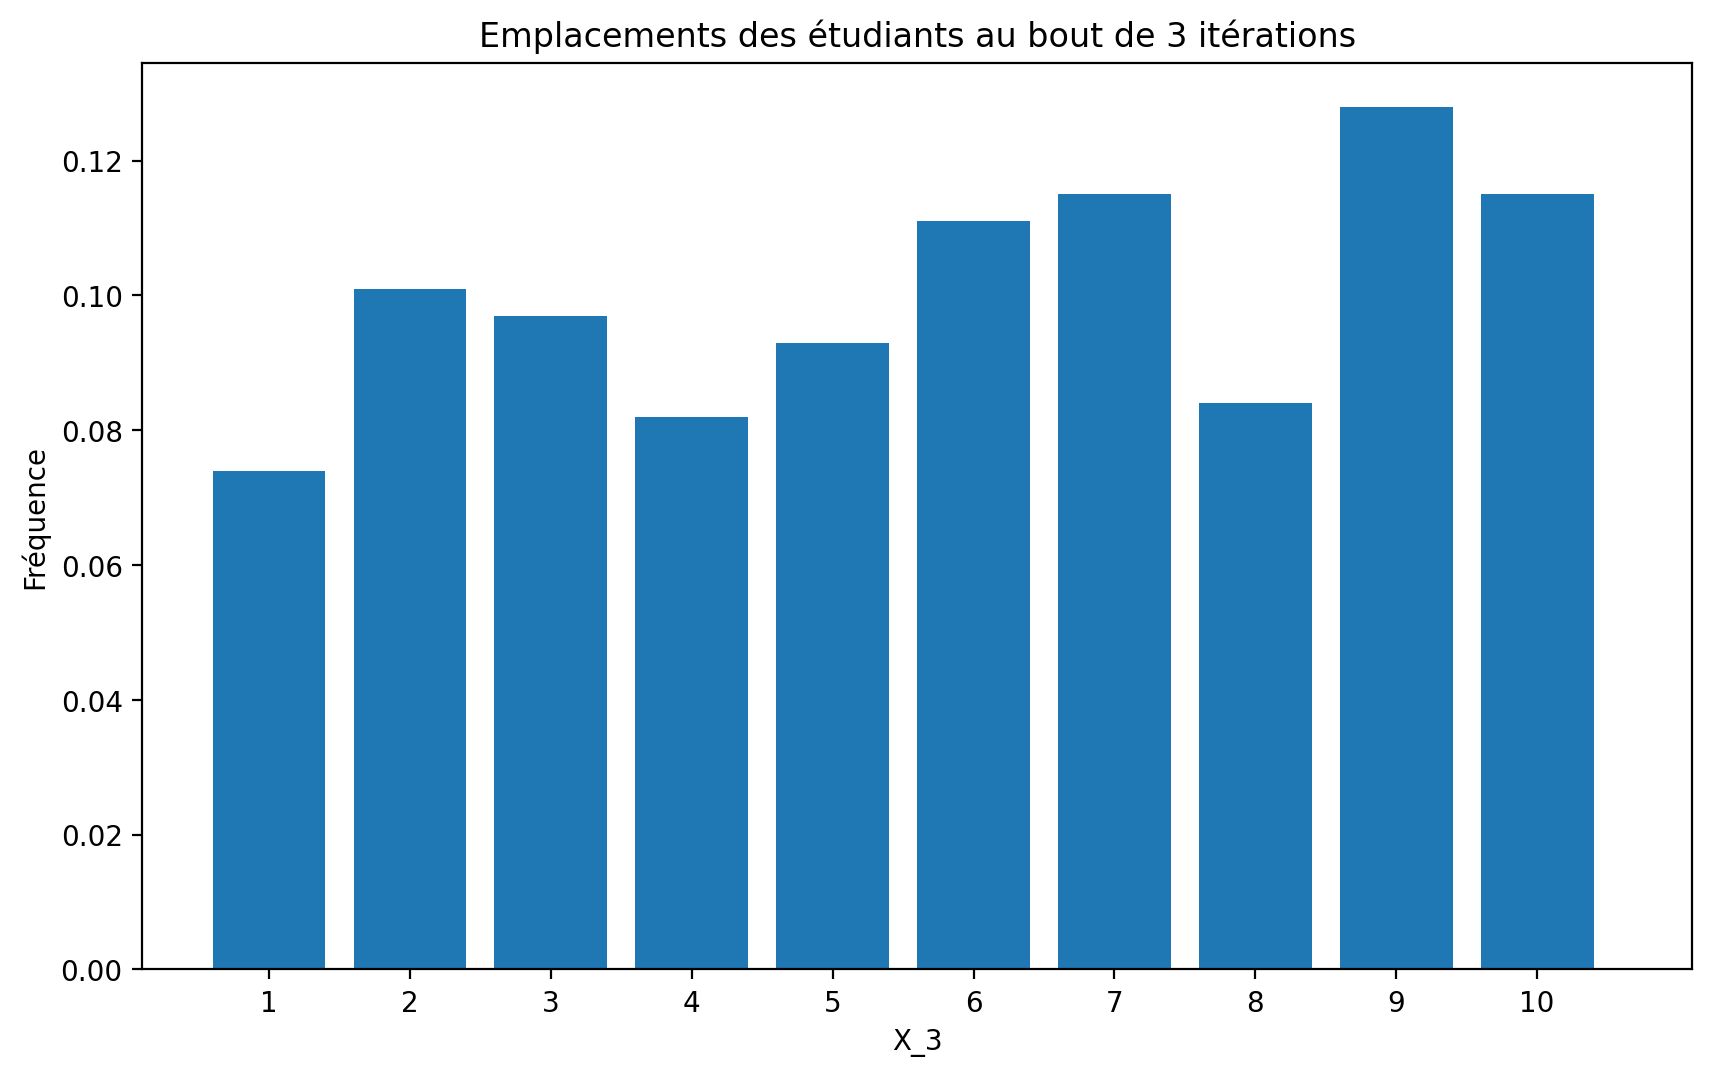

In [44]:
def matrice_stochastique(n, m):
    # On crée une matrice aléatoire de taille n x m
    P = np.random.rand(n, m)
    # On divise chaque coefficient de P par la somme des coefficients de sa ligne 
    P /= np.sum(P, axis=1, keepdims=True)
    return P

#Retourne la position de l'étudiant pour les M simulations au bout de N itérations en partant de X0.
def simulation_etudiant(P, X0, N, M):
    #Positions de l'étudiant dans les M simulations.
    X=X0*np.ones(M, dtype=int)
    #La boucle se termine car N est fini.
    for k in range(N):
        #Passage d'une zone à une autre.
        #La boucle se termine car M est fini.
        for i in range(M):
            zone_actuelle = X[i]
            X[i] = sim_dis(P[zone_actuelle-1], range(1,11), 1)
    return X

N = 3
M = 1000
X0 = 1
P = matrice_stochastique(10,10)

X = simulation_etudiant(P, X0, N, M)

fig = plt.figure(figsize=(10,6), dpi=200)

plt.hist(X, bins=np.arange(0.6, 11.5), width=0.8,density=True)
plt.xticks(range(1, 11))
plt.xlabel("X_3")
plt.ylabel("Fréquence")
plt.title("Emplacements des étudiants au bout de 3 itérations")
plt.show()

### Question 5

On a supposé que $(X_i)_{i \geq 0}$ est une chaîne de Markov. Dans notre cas, c'est une suite de variables aléatoires i.i.d à valeurs dans $[ 1, 10 ]$. Elle simule le déplacement d'un étudiant à travers les zones numérotées de 1 à 10, selon une matrice de probabilité de transition $P = (p_{i,j})_{1 \leq i,j \leq 10} \in \, ]0,1[^{10 \times 10}$ (puisque $\forall (i,j) \in [ 1, 10 ]^2, \, p_{i,j} > 0 $).

De plus, on peut facilement noter que cette matrice de transition $P$ est nécessairement une **matrice stochastique**. </br>

En effet, en partant d'une zone $i$, l'élève doit forcément aller dans une zone $j$ où $j \in [ 1, 10 ]$. Ainsi, $(\mathbb{P}(X_{n+1} = j | X_n = i))_{1\leq j \leq 10}$ définit une probabilité sur $[ 1, 10 ]$ (car $(X_n)_{n \geq 0}$ est une chaîne de Markov). Par conséquent :
\begin{equation*}
    \forall i \in [ 1, 10 ], \quad
    \sum_{j=1}^{10} \mathbb{P}(X_{n+1} = j | X_n = i) = 
    \sum_{j=1}^{10} p_{i,j} = 1
\end{equation*}

On s'intéresse alors ici à $\mathbb{P}(X_3 = 10)$. 

On sait que $P$ est la matrice de transition entre les zones. On en déduit que chaque coefficient $p_{i,j}$ de $P$ correspond à la probabilité pour un étudiant de passer de la zone $i$ à la zone $j$. Et alors, de la même manière, chaque coefficient $p'_{i,j}$ de la matrice $P$ élevée au carré correspond à la probabilité d'aller de la zone $i$ à la zone $j$ en **2 étapes**. Et en suivant ce raisonnement, chaque coefficient $p''_{i,j}$ de la matrice $P^3$ correspond à la probabilité d'aller de la zone $i$ à la zone $j$ en **3 étapes**.

Ainsi, comme $X_0 = 1$ d'après l'énoncé, on a :
\begin{equation*}
    \text{Si }P^3 = (a_{i,j})_{1 \leq i,j \leq 10}, \quad \text{alors, } \boxed{\mathbb{P}(X_3 = 10) = a_{1,10}}
\end{equation*}

In [46]:
theta = np.size(X[X==10])/M

print("Proba empirique =", theta)

P3 = np.linalg.matrix_power(P, 3)

Vrai_proba = P3[0,9]

print("Vrai probabilité =", Vrai_proba)


Proba empirique = 0.115
Vrai probabilité = 0.11076589365594036


De la même manière qu'à la question 3, nous venons de déterminer la \textit{vraie} probabilité associée à $\mathbb{P}(X_3 = 10)$, que l'on note encore ici $\theta^*$. \\ Et, empiriquement, nous avons déterminé une estimation $\hat{\theta}_M$ de $\mathbb{P}(X_3 = 10)$. Pour cela, on a simulé $M$ trajectoires que l'on note : $\forall i \in [ 1, M ], \, X_3^{(i)}$. Et on s'intéresse alors à :
\begin{equation*}
    \hat{\theta}_M = \frac{\# \,(\text{trajectoires $i$ telles que } X_3^{(i)} = 10 )}{M}
\end{equation*}

Et en suivant strictement les mêmes étapes que dans la question 3, on en déduit donc l'intervalle de confiance de notre estimation $\hat{\theta}_M$ à 95\% :

\begin{equation*}
    \boxed{
    \operatorname{IC} = \left[\hat{\theta}_M - 1,96 \,\sqrt{\frac{\hat{\theta}_M (1 - \hat{\theta}_M)}{M}} ; \, \hat{\theta}_M + 1,96 \,\sqrt{\frac{\hat{\theta}_M (1 - \hat{\theta}_M)}{M}} \, \right]
    }
\end{equation*}

In [47]:
IC = [theta -1.96 * np.sqrt(theta*(1 - theta)/M), theta + 1.96 * np.sqrt(theta*(1 - theta)/M)]
print("Intervalle de confiance =",IC)

Intervalle de confiance = [0.09522681512755217, 0.13477318487244785]


Ainsi, on remarque effectivement que :

$$
\boxed{
\theta^* \in \operatorname{IC}
}
$$

### Question 6

Répétons les deux parties précédentes avec $N = 100$.

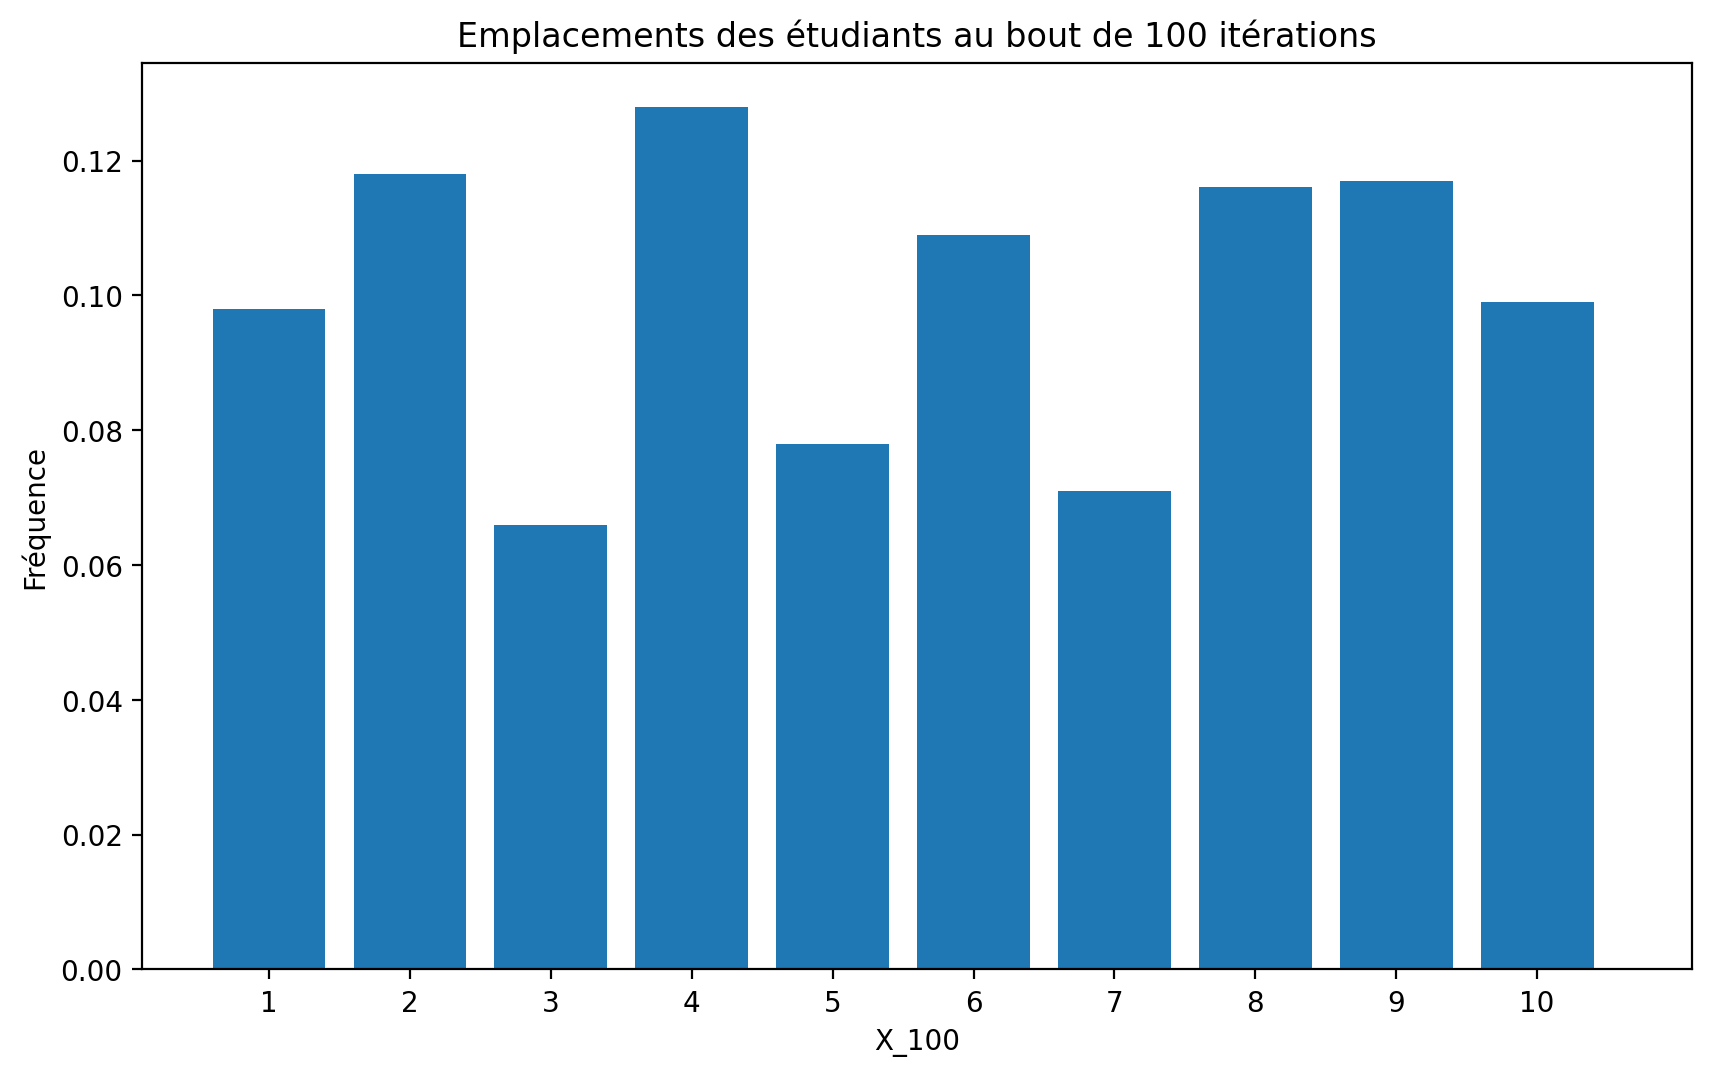

In [48]:
N = 100
M = 1000
X0 = 1
P = matrice_stochastique(10,10)

X = simulation_etudiant(P, X0, N, M)

fig = plt.figure(figsize=(10,6), dpi=200)

plt.hist(X, bins=np.arange(0.6, 11.5), width=0.8, density=True)
plt.xticks(range(1, 11))
plt.xlabel("X_100")
plt.ylabel("Fréquence")
plt.title("Emplacements des étudiants au bout de 100 itérations")
plt.show()

In [49]:
theta = np.size(X[X==10])/M

print("Proba empirique =", theta)

P100 = np.linalg.matrix_power(P, 100)

Vrai_proba = P100[0,9]

print("Vrai probabilité =", Vrai_proba)

Proba empirique = 0.099
Vrai probabilité = 0.10199957031381893


On réitère ce que nous avons fait aux questions 4 et 5, mais cette fois-ci $N \neq 3$ puisque l'étudiant effectue maintenant 100 déplacements à travers ces 10 zones : $N = 100$.

Donc, comme $X_0 = 1$ d'après l'énoncé, on a :
\begin{equation*}
    \text{Si }P^{100} = (a_{i,j})_{1 \leq i,j \leq 10}, \quad \text{alors, } \boxed{\mathbb{P}(X_{100} = 10) = a_{1,10}}
\end{equation*}

Et, en posant : 
\begin{equation*}
    \hat{\theta}_M = \frac{\# \,(\text{trajectoires $i$ telles que } X_{100}^{(i)} = 10 )}{M}
\end{equation*}

L'expression de notre intervalle de confiance à 95\% ne change pas :
\begin{equation*}
    \operatorname{IC} = \left[\hat{\theta}_M - 1,96 \,\sqrt{\frac{\hat{\theta}_M (1 - \hat{\theta}_M)}{M}} ; \, \hat{\theta}_M + 1,96 \,\sqrt{\frac{\hat{\theta}_M (1 - \hat{\theta}_M)}{M}} \, \right]
\end{equation*}

In [50]:
IC = [theta -1.96 * np.sqrt(theta*(1 - theta)/M), theta + 1.96 * np.sqrt(theta*(1 - theta)/M)]
print("Intervalle de confiance =",IC)

Intervalle de confiance = [0.08048873644507215, 0.11751126355492786]


Ainsi, on remarque effectivement que :

$$
\boxed{
\theta^* \in \operatorname{IC}
}
$$

### Question 7

Nous modélisons les mouvements de $N_e$ étudiants sur le plateau de jeu avec $N_s$ zones via $N_e$ chaînes de Markov indépendantes $X^{(i)}, \quad i = 1, . . . , N_e$, prenant des valeurs dans $\{1, 2 . . . , Ns\}$,
en commençant toutes dans la zone 1, et avec une matrice de transition commune $P \in [0, 1]^{10×10}$. Nous modélisons également les mouvements du monstre avec une chaîne
de Markov indépendante $Y$ , avec $Y_0 = N_s$ et une matrice de transition $Q$.

Ecrivons une fonction $\texttt{death_time(Ne, Ns, P, Q, N)}$ qui calcule le temps de survie de la population d’étudiants sur une simulation des mouvements jusqu’à l’itération $N$. Choisissons aléatoirement une matrice de transition avec des coefficients strictement positifs $P$ et
une matrice de transition arbitraire $Q$.

Prenons $N_e = 5$, $N_s = 10$ et $N = 100$. En utilisant
la fonction death $\texttt{time(Ne, Ns, P, Q, N)}$, traçons un histogramme du temps de survie de
la population d’étudiants sur $M = 100$ simulations. Calculons le temps de survie moyen
sur les $M = 100$ simulations.

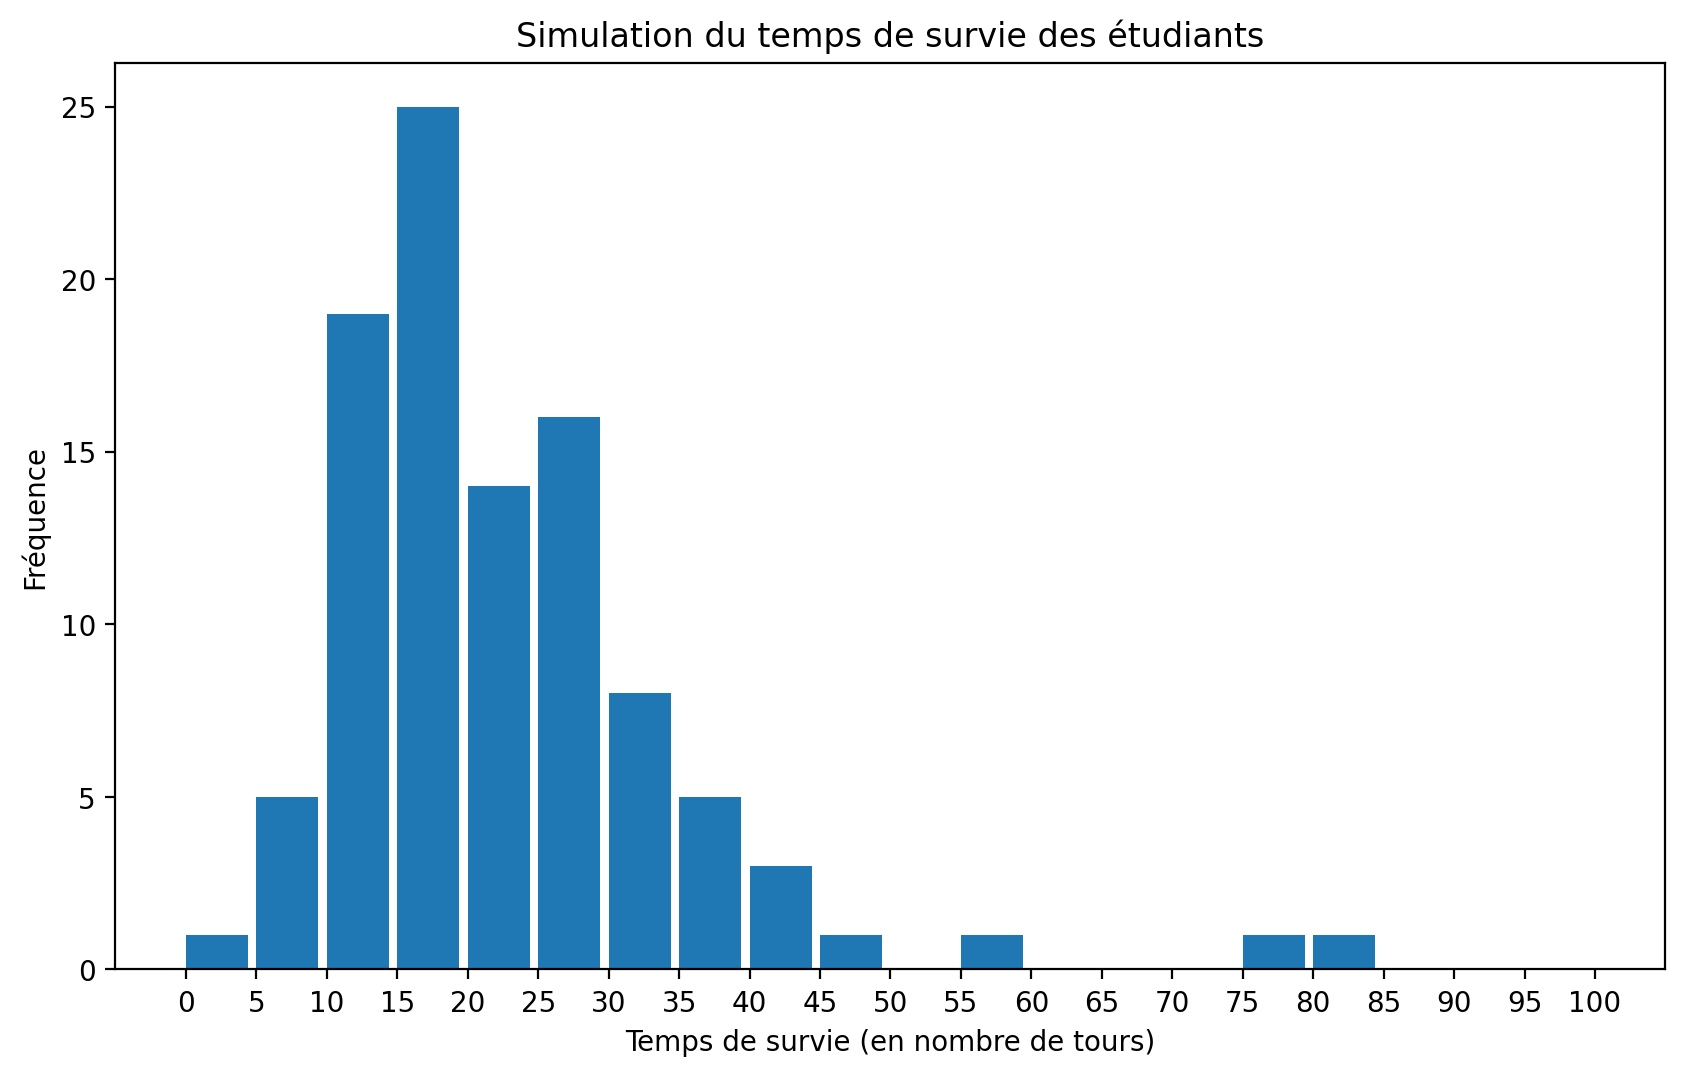

In [27]:
Ne = 5
Ns = 10
N = 100

P = matrice_stochastique(Ns, Ns)
Q = matrice_stochastique(Ns, Ns)

#Retourne le nombre de tour où les N étudiants sont morts
def death_time(Ne, Ns, P, Q, N):
    # Initialisation

    X_monstre = Ns
    X_eleves = np.ones(Ne,dtype=int)
    Nb_dead = 0

    tour = 0
    #La boucle se termine car tour augmente à chaque itération et N est fini.
    while (tour < N and Nb_dead < Ne):

        # Déplacement du monstre
        X_monstre = int(sim_dis(Q[X_monstre-1],range(1,Ns+1),1))

        # Déplacements des étudiants
        #La boucle se termine car Ne est fini
        for i in range (Ne):
            if X_eleves[i]!=0: # Si l'élève i n'est pas mort alors on le déplace
                X_eleves[i] = sim_dis(P[X_eleves[i]-1],range(1,Ns+1),1)
                if X_eleves[i] == X_monstre: # L'élève et le monstre sont dans la même zone donc on augmente le compteur de morts
                    X_eleves[i] = 0  # Le monste mange l'élève
                    Nb_dead+=1
        tour+=1

    return tour

#Application de death_time sur M simulations
def simulation_death_time(M):
    return np.array([death_time(Ne, Ns, P, Q, N) for k in range (M)])

M = 100

X = simulation_death_time(M)

fig = plt.figure(figsize=(10,6), dpi=200)

plt.hist(X, bins=np.arange(0,101,5), width = 4.4)
plt.xticks(np.arange(0, 101, 5))
plt.locator_params(axis='y', integer=True)
plt.xlabel("Temps de survie (en nombre de tours)")
plt.ylabel("Fréquence")
plt.title("Simulation du temps de survie des étudiants")
plt.show()

In [23]:
Temps_survie_moy = np.sum(X)/M

print(Temps_survie_moy)

22.62


On peut remarquer que sur une base de dix zones, les étudiants arrivent très rarement à survivre plus de 50 tours (au vu de nos simulations). Et, sur la  grande majorité des simulations, les étudiants meurent entre 10 et 30 tours.

### Question 7 (Bonus)

Notre fonction initiale de la question 7 retournait seulement le tour où l'ensemble des étudiants ont été mangés. Il peut alors être intéressant de renvoyer davantage d'informations ! C'est ce que nous avons décider de faire ici, au lieu de renvoyer le numéro du tour final, on renvoie un tableau de taille 101 (puisque les étudiants restent 100 tours au maximum) qui contient à chaque case $i$ le nombre d'étudiants restant dans la simulation au tour $i$.

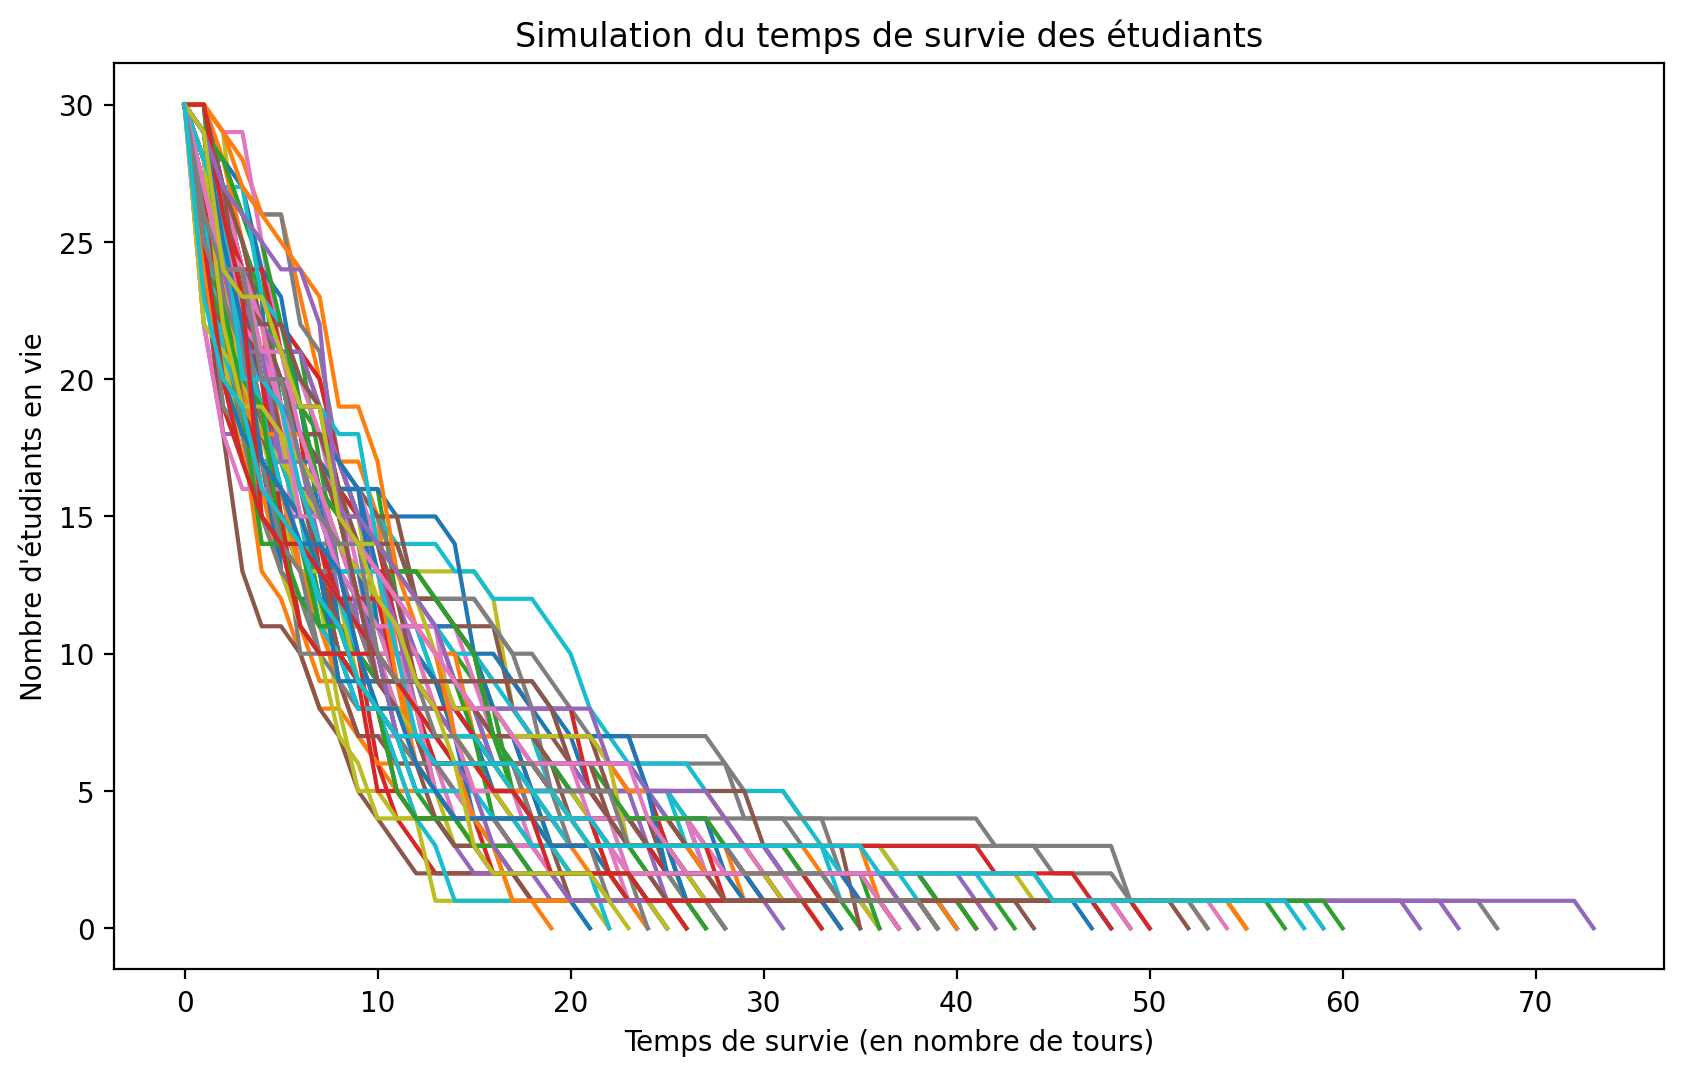

In [30]:
Ne = 30
Ns = 10
N = 100

P = matrice_stochastique(Ns, Ns)
Q = matrice_stochastique(Ns, Ns)

M = 100

def tab_death_time(Ne, Ns, P, Q, N):
    # Initialisation

    X_monstre = Ns
    X_eleves = np.ones(Ne,dtype=int)
    Nb_dead = 0
    
    tab_vies = [Ne]
    
    tour = 0

    while (tour < N and Nb_dead < Ne):

        # Monstre
        X_monstre = int(sim_dis(Q[X_monstre-1],range(1,Ns+1),1))

        # Elèves
        for i in range (0,Ne):
            if X_eleves[i]!=0: # Si l'élève i n'est pas mort
                X_eleves[i] = sim_dis(P[X_eleves[i]-1],range(1,Ns+1),1)
                if X_eleves[i] == X_monstre: # L'élève et le monstre sont dans la même zone
                    X_eleves[i] = 0  # Le monste mange l'élève
                    Nb_dead+=1
                    
        tab_vies.append(Ne - Nb_dead)  # On ajoute dans notre tableau à ce tour le nombre d'étudiants restant  
        tour+=1
    
    # if (Ne != Nb_dead):
    #     print("Tous les élèves ne sont pas morts, il en reste", Ne - Nb_dead, "dans le jeu")
    
    return tab_vies

def simulation_tab_death_time(M):
    X = np.zeros((N+1,M))
    for k in range(M):
        Xk = np.array(tab_death_time(Ne, Ns, P, Q, N))
        X[0:len(Xk),k]=Xk    
    return X


X = simulation_tab_death_time(M)

fig = plt.figure(figsize=(10,6), dpi=200)

for i in range(M):
    j = np.argmax(X[:,i] == 0)   # Trouver l'indice de la première occurrence de 0 dans la colonne i
    plt.plot(X[:j+1,i])          # Tracer jusqu'à cet indice (+1)
    #plt.step(range(j+1),X[:j+1,i])
 
plt.xlabel("Temps de survie (en nombre de tours)")
plt.ylabel("Nombre d'étudiants en vie")
plt.title("Simulation du temps de survie des étudiants")
plt.show()

On a alors tracé la courbe du temps de vie des étudiants en fonction du nombre de tours, pour nos $M = 100$ simulations. Pour chacune de ces simulations, on est parti avec 30 étudiants répartis dans 10 zones pour que cela soit plus visuelle.

On remarque que, dans l'ensemble des simulations, les $2/3$ des étudiants sont mangés par le monstre assez rapidement en plus ou moins 10 tours. Et le reste des étudiants tend à survivre plus longtemps dans la simulation. On a globalement des courbes qui peuvent s'assimiler à des inverses d'exponentielle.